Hello, this is six sigma project on extrusion malfunction. Our goal is to inspect and solve problems with this malfunction. The extruder consists of three separate plants that take the granular raw material, and then stretch it into a plastic film by heating and drawing in three layers. The most important type of defect is film breakage, and it is what the customer asks to minimize. Malfunctions occurs when -  a speck fall into the “head” of the extruder (or other mechanical), holes on the canvas are present, raw granules are non-melting.

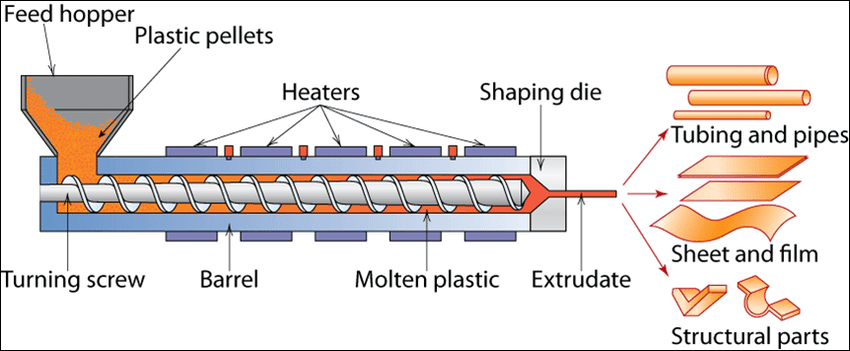

In [1]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from bs4 import BeautifulSoup
import requests
import re
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import plotly 
import plotly.graph_objects as go 
from plotly.offline import iplot 
import plotly.express as px
import plotly.figure_factory as ff
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




/kaggle/input/find-a-defect-in-the-production-extrusion-line/extrusion.csv
/kaggle/input/find-a-defect-in-the-production-extrusion-line/legend.xlsx
/kaggle/input/find-a-defect-in-the-production-extrusion-line/stat.csv


In [3]:
extrusion = pd.read_csv("/kaggle/input/find-a-defect-in-the-production-extrusion-line/extrusion.csv")
statistics = pd.read_csv("/kaggle/input/find-a-defect-in-the-production-extrusion-line/stat.csv")

In [4]:
extrusion


,Datum,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,...,ST114_VARTensPlusSp,ST114_VARTotalLen,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis
0,25.06.2018 4:40,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,78.0,0.0,50.0,5.0,15.0,53.0
1,25.06.2018 4:42,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,49.0
2,25.06.2018 4:45,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,48.0
3,25.06.2018 4:47,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,50.0
4,25.06.2018 4:49,0.0,11.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226531,25.06.2019 6:36,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0
226532,25.06.2019 6:38,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0
226533,25.06.2019 6:40,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0
226534,25.06.2019 6:42,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0


In [5]:
extrusion.describe()


,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,ST110_VARExtr_0_HeizungZone_5_Regler_Y,...,ST114_VARTensPlusSp,ST114_VARTotalLen,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis
count,226536.0,226474.000000,226474.000000,226474.0,226474.000000,226474.000000,226474.000000,226474.0,226474.000000,226474.000000,...,225435.000000,2.254350e+05,225435.000000,225435.000000,225435.000000,225435.0,225435.000000,225435.0,225435.0,225435.00000
mean,0.0,3.033558,176.069761,1.0,184.111399,0.565540,176.237815,1.0,176.359344,11.219849,...,21.104620,1.127531e+06,709.736514,0.793998,57.329057,0.0,69.033584,5.0,15.0,57.27753
std,0.0,7.461482,16.550270,0.0,21.348341,3.585595,16.569598,0.0,20.954396,9.545225,...,0.306064,1.409486e+06,920.508457,0.404433,32.022970,0.0,23.117881,0.0,0.0,31.43569
min,0.0,0.000000,100.000000,1.0,14.000000,0.000000,100.000000,1.0,10.000000,0.000000,...,21.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,40.000000,5.0,15.0,-4.00000
25%,0.0,0.000000,172.000000,1.0,180.000000,0.000000,172.000000,1.0,173.000000,3.000000,...,21.000000,1.691720e+05,102.000000,1.000000,31.000000,0.0,55.000000,5.0,15.0,49.00000
50%,0.0,0.000000,178.000000,1.0,186.000000,0.000000,178.000000,1.0,180.000000,11.000000,...,21.000000,5.182820e+05,291.000000,1.000000,73.000000,0.0,60.000000,5.0,15.0,58.00000
75%,0.0,3.000000,180.000000,1.0,191.000000,0.000000,182.000000,1.0,185.000000,17.000000,...,21.000000,1.404420e+06,889.000000,1.000000,83.000000,0.0,75.000000,5.0,15.0,67.00000
max,0.0,100.000000,250.000000,1.0,253.000000,100.000000,250.000000,1.0,254.000000,100.000000,...,22.000000,5.898309e+06,3860.000000,1.000000,100.000000,0.0,230.000000,5.0,15.0,302.00000


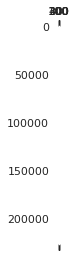

In [6]:
import matplotlib.pyplot as plt
plt.spy(extrusion.isnull())

In [7]:
statistics

,Tags,Mean,Var
0,ST0_VARActAuftrag,0.000000,0.000000
1,ST110_VARExtr_0_HeizungZone_3_Regler_Y,3.033738,55.673467
2,ST110_VARExtr_0_HeizungZone_3_SollTemp,176.070130,273.909321
3,ST110_VARExtr_0_HeizungZone_4_Konfig,1.000000,0.000000
4,ST110_VARExtr_0_HeizungZone_4_Regler_X,184.111635,455.741691
...,...,...,...
464,ST114_VARWdSpSpeed,0.000000,0.000000
465,ST114_VARWdSpTens,69.033077,534.431833
466,ST114_VARWdTapeNum,5.000000,0.000000
467,ST114_VARWdTapeReductVal,15.000000,0.000000


From the legend info we can see that actual layer thickness is calles SDickeIst - 'ST110_VAREx_0_SDickeIst' - for extruder 0 
'ST110_VAREx_1_SDickeIst'- for extruder A 
'ST110_VAREx_2_SDickeIst'- for extruder B 
'ST110_VAREx_3_SDickeIst'- for extruder C


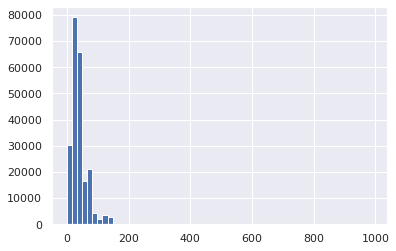

In [8]:
extrusion['ST110_VAREx_0_SDickeIst'].hist(bins=60);

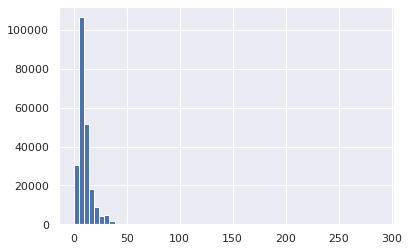

In [9]:
extrusion['ST110_VAREx_1_SDickeIst'].hist(bins=60);

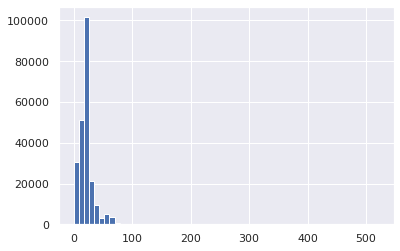

In [10]:
extrusion['ST110_VAREx_2_SDickeIst'].hist(bins=60);

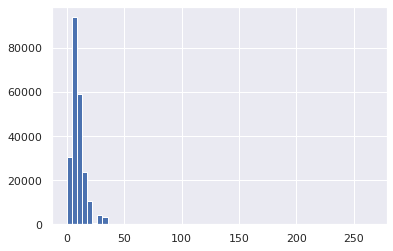

In [11]:
extrusion['ST110_VAREx_3_SDickeIst'].hist(bins=60);

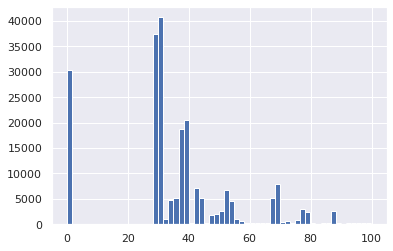

In [12]:
extrusion[extrusion['ST110_VAREx_0_SDickeIst'] < 100]['ST110_VAREx_0_SDickeIst'].hist(bins=60);

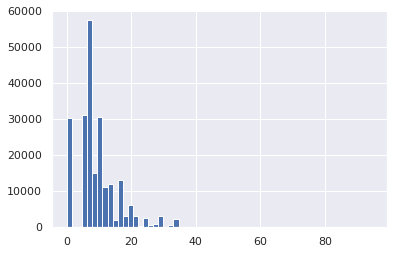

In [13]:
extrusion[extrusion['ST110_VAREx_1_SDickeIst'] < 100]['ST110_VAREx_1_SDickeIst'].hist(bins=60);

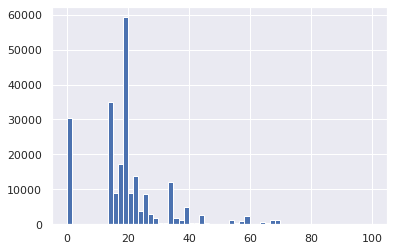

In [14]:
extrusion[extrusion['ST110_VAREx_2_SDickeIst'] < 100]['ST110_VAREx_2_SDickeIst'].hist(bins=60);

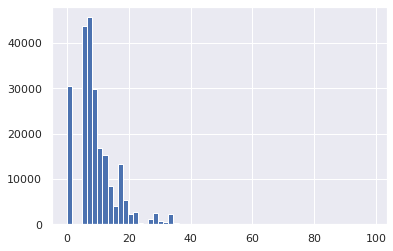

In [15]:
extrusion[extrusion['ST110_VAREx_3_SDickeIst'] < 100]['ST110_VAREx_3_SDickeIst'].hist(bins=60);

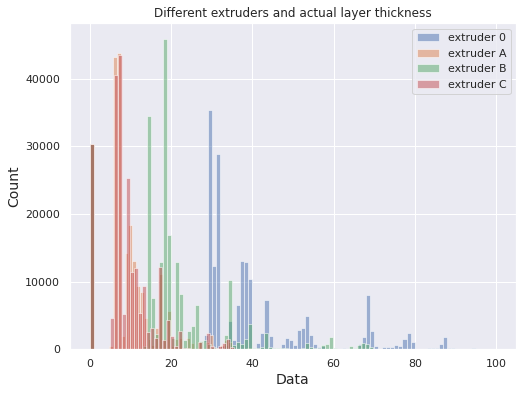

In [16]:
plt.figure(figsize=(8,6))
plt.hist(extrusion[extrusion['ST110_VAREx_0_SDickeIst'] < 100]['ST110_VAREx_0_SDickeIst'], bins=100, alpha=0.5, label="extruder 0")
plt.hist(extrusion[extrusion['ST110_VAREx_1_SDickeIst'] < 100]['ST110_VAREx_1_SDickeIst'], bins=100, alpha=0.5, label="extruder A")
plt.hist(extrusion[extrusion['ST110_VAREx_2_SDickeIst'] < 100]['ST110_VAREx_2_SDickeIst'], bins=100, alpha=0.5, label="extruder B")
plt.hist(extrusion[extrusion['ST110_VAREx_3_SDickeIst'] < 100]['ST110_VAREx_3_SDickeIst'], bins=100, alpha=0.5, label="extruder C")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Different extruders and actual layer thickness")
plt.legend(loc='upper right')



Let's assume that layer thickness 0 on either of those extruders means malfunction, we will generate binary classificator to distinguish those groups, at least I can assume that from author description. From our graph point of view, the "0" thickness ones seems to overlap. let us check that.

In [17]:
extrusion['EXT0'] = extrusion['ST110_VAREx_0_SDickeIst'].apply(lambda x: 1 if x == 0 else 0)

In [18]:
extrusion['EXTA'] = extrusion['ST110_VAREx_1_SDickeIst'].apply(lambda x: 1 if x == 0 else 0)

In [19]:
extrusion['EXTB'] = extrusion['ST110_VAREx_2_SDickeIst'].apply(lambda x: 1 if x == 0 else 0)

In [20]:
extrusion['EXTC'] = extrusion['ST110_VAREx_3_SDickeIst'].apply(lambda x: 1 if x == 0 else 0)

In [21]:
extrusion['EXTsum'] = extrusion['EXTC']+extrusion['EXTA']+extrusion['EXTB']+extrusion['EXT0']

In [22]:
extrusion['EXTtotal'] = extrusion['EXTsum'].apply(lambda x: 0 if x == 0 else 1)

In [23]:
extrusion.describe()

,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,ST110_VARExtr_0_HeizungZone_5_Regler_Y,...,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis,EXT0,EXTA,EXTB,EXTC,EXTsum,EXTtotal
count,226536.0,226474.000000,226474.000000,226474.0,226474.000000,226474.000000,226474.000000,226474.0,226474.000000,226474.000000,...,225435.000000,225435.0,225435.0,225435.00000,226536.000000,226536.000000,226536.000000,226536.000000,226536.000000,226536.000000
mean,0.0,3.033558,176.069761,1.0,184.111399,0.565540,176.237815,1.0,176.359344,11.219849,...,69.033584,5.0,15.0,57.27753,0.133877,0.134160,0.134076,0.134239,0.536352,0.134495
std,0.0,7.461482,16.550270,0.0,21.348341,3.585595,16.569598,0.0,20.954396,9.545225,...,23.117881,0.0,0.0,31.43569,0.340521,0.340825,0.340735,0.340910,1.362227,0.341184
min,0.0,0.000000,100.000000,1.0,14.000000,0.000000,100.000000,1.0,10.000000,0.000000,...,40.000000,5.0,15.0,-4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,172.000000,1.0,180.000000,0.000000,172.000000,1.0,173.000000,3.000000,...,55.000000,5.0,15.0,49.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,178.000000,1.0,186.000000,0.000000,178.000000,1.0,180.000000,11.000000,...,60.000000,5.0,15.0,58.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,3.000000,180.000000,1.0,191.000000,0.000000,182.000000,1.0,185.000000,17.000000,...,75.000000,5.0,15.0,67.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,100.000000,250.000000,1.0,253.000000,100.000000,250.000000,1.0,254.000000,100.000000,...,230.000000,5.0,15.0,302.00000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [24]:
extrusion.drop(columns=['EXT0', 'EXTA', 'EXTB', 'EXTC', 'EXTsum'])

,Datum,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,...,ST114_VARTotalLen,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis,EXTtotal
0,25.06.2018 4:40,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,3544103.0,2174.0,1.0,78.0,0.0,50.0,5.0,15.0,53.0,0
1,25.06.2018 4:42,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,49.0,0
2,25.06.2018 4:45,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,48.0,0
3,25.06.2018 4:47,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,50.0,0
4,25.06.2018 4:49,0.0,11.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,51.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226531,25.06.2019 6:36,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0,0
226532,25.06.2019 6:38,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0,0
226533,25.06.2019 6:40,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0,0
226534,25.06.2019 6:42,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0,0


phew! that's good :) Now we have something to work with, let see how the contribution is going

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='EXTtotal', ylabel='count'>

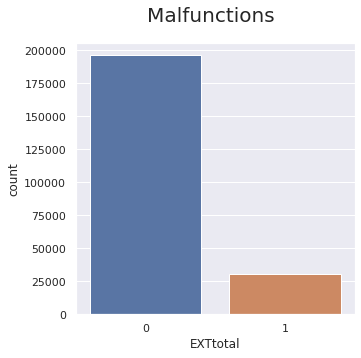

In [25]:
plt.figure(figsize=(5, 5))
            # 'ax' has references to all the four axes
plt.suptitle("Malfunctions", fontsize=20)
sns.countplot(extrusion['EXTtotal']) 

Looks rather normal for malfunctions. Groups are unbalanced - not very surprising. 479 columns - there are too many for our analysis, we will trim this.

"Plastics extrusion is a high-volume manufacturing process in which raw plastic is melted and formed into a continuous profile. Extrusion produces items such as pipe/tubing, weatherstripping, fencing, deck railings, window frames, plastic films and sheeting, thermoplastic coatings, and wire insulation.

This process starts by feeding plastic material (pellets, granules, flakes or powders) from a hopper into the barrel of the extruder. The material is gradually melted by the mechanical energy generated by turning screws and by heaters arranged along the barrel. The molten polymer is then forced into a die, which shapes the polymer into a shape that hardens during cooling." https://en.wikipedia.org/wiki/Plastic_extrusion

Video of plastic extrusion

<iframe width="1536" height="722" src="https://www.youtube.com/embed/-8GR3pG1gsE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [26]:
!pip install pandas-profiling

In [27]:
from pandas_profiling import ProfileReport
#profext = ProfileReport(extrusion)
profext = ProfileReport(extrusion.sample(n=3000)) 

In [ ]:
profext.to_notebook_iframe() 

Summarize dataset:   0%|          | 0/490 [00:00<?, ?it/s]

The Idea behind this analysis is to find occurence in timeline, go some time earlier and mark it. Next step is to clean occurence data, to not fool the analysis. this way we will be able to find what is happening before occurence.
before cleaning we need to check which features are the most correlated with extrusion problems. Very frustrating is not knowing the process itself (I can imagine why there is so few people looking at this dataset), however we will explore data and I hope it will help with analysis.
